<a href="https://colab.research.google.com/github/KarSanJu/Arquivos_legais2/blob/main/C%C3%B3pia_de_Project_Rupture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install sidetable



import numpy as np
import pandas as pd

import sidetable
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rup = pd.read_excel('/content/rup.xlsx')

In [ ]:
rup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367306 entries, 0 to 367305
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Comp.                                     367306 non-null  object 
 1   Código Fornecedor                         367306 non-null  object 
 2   Nome Fornecedor                           367024 non-null  object 
 3   Cód.                                      367306 non-null  int64  
 4   Descrição                                 367306 non-null  object 
 5   Curva Transf. Comprador                   367306 non-null  object 
 6   Pesquisa                                  367306 non-null  object 
 7   MP                                        367306 non-null  object 
 8   IMP                                       367306 non-null  object 
 9   Ativos                                    367306 non-null  int64  
 10  Ruptura             

In [ ]:
#RENOMEANDO COLUNAS
rup.rename(columns = {'Estoq Qtd CX CD4':'Estoq Qtd CX CT40'})

,Comp.,Código Fornecedor,Nome Fornecedor,Cód.,Descrição,Curva Transf. Comprador,Pesquisa,MP,IMP,Ativos,...,Estoque em Unidades Ativos,Dta. Ult. Ent.,Estoq Qtd CX CD,Estoq Qtd CX CD2,Estoq Qtd CX CT40,Estoq Qtd CX CD Total,Grupo de mercadorias externo Denominação,Estoque Quantidade CX Transf Centros,Maior Contador,Texto_Hierarquia3
0,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,2307,44848,8064,0,0,8064,-,-,8.0,Agua Sem Gas
1,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,1174,44847,8064,0,0,8064,-,-,8.0,Agua Sem Gas
2,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,564,44840,8064,0,0,8064,-,168,8.0,Agua Sem Gas
3,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,999,44849,8064,0,0,8064,-,-,8.0,Agua Sem Gas
4,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,559,44840,8064,0,0,8064,-,84,8.0,Agua Sem Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367301,PLQ,675194,LACTICINIOS TIROL LTDA,936833,BEB LAC TIROL SHOWKINHO CHOC 200ml,A,N,N,N,1,...,2194,44803,4785,0,0,4785,-,-,27.0,Achocolatado
367302,PLQ,675194,LACTICINIOS TIROL LTDA,936833,BEB LAC TIROL SHOWKINHO CHOC 200ml,A,N,N,N,1,...,691,44803,4785,0,0,4785,-,-,27.0,Achocolatado
367303,PLQ,675194,LACTICINIOS TIROL LTDA,936833,BEB LAC TIROL SHOWKINHO CHOC 200ml,B,N,N,N,1,...,7141,44804,4785,0,0,4785,-,-,27.0,Achocolatado
367304,PLQ,675194,LACTICINIOS TIROL LTDA,936833,BEB LAC TIROL SHOWKINHO CHOC 200ml,A,N,N,N,1,...,761,44803,4785,0,0,4785,-,-,27.0,Achocolatado


In [ ]:
rup.head()

,Comp.,Código Fornecedor,Nome Fornecedor,Cód.,Descrição,Curva Transf. Comprador,Pesquisa,MP,IMP,Ativos,...,Estoque em Unidades Ativos,Dta. Ult. Ent.,Estoq Qtd CX CD,Estoq Qtd CX CD2,Estoq Qtd CX CD4,Estoq Qtd CX CD Total,Grupo de mercadorias externo Denominação,Estoque Quantidade CX Transf Centros,Maior Contador,Texto_Hierarquia3
0,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,2307,44848,8064,0,0,8064,-,-,8.0,Agua Sem Gas
1,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,1174,44847,8064,0,0,8064,-,-,8.0,Agua Sem Gas
2,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,564,44840,8064,0,0,8064,-,168,8.0,Agua Sem Gas
3,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,999,44849,8064,0,0,8064,-,-,8.0,Agua Sem Gas
4,BAR,5932,MINALBA ALIMENTOS E BEBIDAS LTDA,338486,"AGUA MINERAL S GAS MINALBA 1,5L",B,S,N,N,1,...,559,44840,8064,0,0,8064,-,84,8.0,Agua Sem Gas


In [ ]:
rup.shape

(367306, 22)

In [ ]:
rup['Ruptura'].mean()*100

18.907668265696724

In [ ]:
rup.describe(percentiles=[0.01, 0.05, 0.995, 0.999])

,Cód.,Ativos,Ruptura,Estoque em Unidades Ativos,Estoq Qtd CX CD,Estoq Qtd CX CD2,Estoq Qtd CX CD4,Estoq Qtd CX CD Total,Maior Contador
count,367306.000000,367306.0,367306.000000,367306.000000,367306.000000,367306.000000,367306.000000,367306.000000,367306.000000
mean,866730.427875,1.0,0.189077,232.551216,47.724216,28.235237,25.994111,101.953565,22.619867
std,272819.066567,0.0,0.391570,1456.524776,300.643652,661.510439,486.237353,873.277475,46.401556
min,27.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1%,2650.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5%,70874.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,958187.000000,1.0,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,12.000000
99.5%,999518.000000,1.0,1.000000,5839.800000,1849.000000,760.000000,756.000000,4069.000000,288.000000
99.9%,999945.000000,1.0,1.000000,14155.730000,4224.000000,4243.000000,8687.000000,9182.000000,672.000000
max,999999.000000,1.0,1.000000,327384.000000,9002.000000,30954.000000,26208.000000,30954.000000,1056.000000


In [ ]:
rup['Ruptura'].mean()

0.18907668265696723

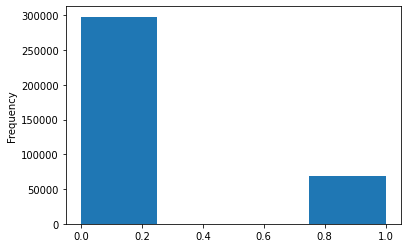

In [ ]:
rup['Ruptura'].plot.hist(bins=4);

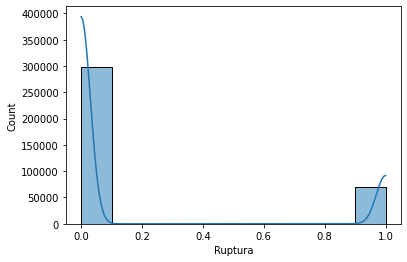

In [ ]:
sns.histplot(x=rup['Ruptura'], kde=True, bins=10);

In [ ]:
px.histogram(rup, x='Ruptura', title='PROJETO RUPTURA')

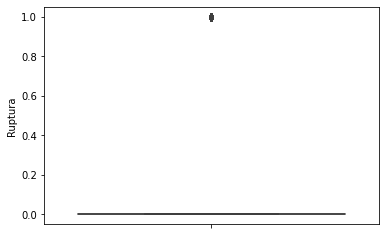

In [ ]:
sns.boxplot(data=rup, y='Ruptura')

In [ ]:
px.box(rup, y='Ruptura')